# EDA of SPX Data

### Plan for EDA
Each section will compare overall vs put vs call
1. Describing the data
2. Correlation Analyses
3. Time Series Data
4. Greeks

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Describing the data

In [29]:
df = pd.read_csv('L3_SPX_20240423.csv')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   underlying       7080 non-null   object 
 1   underlying_last  7080 non-null   float64
 2    exchange        7080 non-null   object 
 3   optionroot       7080 non-null   object 
 4   optionext        0 non-null      float64
 5   type             7080 non-null   object 
 6   expiration       7080 non-null   object 
 7   quotedate        7080 non-null   object 
 8   strike           7080 non-null   int64  
 9   last             7080 non-null   float64
 10  bid              7080 non-null   float64
 11  ask              7080 non-null   float64
 12  volume           7080 non-null   int64  
 13  openinterest     7080 non-null   int64  
 14  impliedvol       7080 non-null   float64
 15  delta            7080 non-null   float64
 16  gamma            7080 non-null   float64
 17  theta         

### Dropping null columns
`optionext`, `optionalias`, `IVBid` and `IVAsk` are entirely null.

In [31]:
df = df.drop(['optionext','optionalias','IVBid','IVAsk'],axis=1)

### Converting relevant columns to datetime
`expiration` and `quotedate`

In [37]:
df['expiration'] = pd.to_datetime(df['expiration'])
df['quotedate'] = pd.to_datetime(df['quotedate'])


## Splitting the df into puts and calls for additional comparisons

In [53]:
df_put = df[df['type'] == 'put']
df_call = df[df['type'] == 'call']

In [54]:
df_put.describe()

underlying_last                     expiration  \
count     3.540000e+03                           3540   
mean      5.070470e+03  2025-02-01 17:17:41.694915072   
min       5.070470e+03            2024-05-17 00:00:00   
25%       5.070470e+03            2024-07-19 00:00:00   
50%       5.070470e+03            2024-10-18 00:00:00   
75%       5.070470e+03            2025-03-21 00:00:00   
max       5.070470e+03            2029-12-21 00:00:00   
std       1.819246e-12                            NaN   

                           quotedate        strike         last          bid  \
count                           3540   3540.000000  3540.000000  3540.000000   
mean   2024-04-23 16:00:00.000000256   4630.224576   207.101040   337.105071   
min              2024-04-23 16:00:00    200.000000     0.000000     0.000000   
25%              2024-04-23 16:00:00   3850.000000     2.537500    15.000000   
50%              2024-04-23 16:00:00   4730.000000    38.000000    75.950000   
75%              2024-04-23 16:00:00   5375.000000   181.067500   318.225000   
max              2024-04-23 16:00:00  12000.000000  6379.000000  6001.500000   
std                              NaN   1531.621465   526.818957   674.351064   

               ask        volume   openinterest   impliedvol        delta  \
count  3540.000000   3540.000000    3540.000000  3540.000000  3540.000000   
mean    343.032218    123.066667    2620.217514     0.161742    -0.382975   
min       0.050000      0.000000       0.000000     0.044400    -1.000000   
25%      15.475000      0.000000       7.000000     0.091075    -0.837150   
50%      76.950000      0.000000     293.000000     0.128400    -0.200950   
75%     324.400000     12.000000    2076.500000     0.203675    -0.027600   
max    6069.900000  25205.000000  205201.000000     1.902800     0.000000   
std     683.517017    807.536065    8371.439389     0.118421     0.393741   

             gamma        theta         vega  
count  3540.000000  3540.000000  3540.000000  
mean      0.000342   -46.130479   599.882322  
min       0.000000  -479.013500     0.000000  
25%       0.000000  -109.727375     5.431075  
50%       0.000100   -35.060400   339.288050  
75%       0.000500     0.000000   937.007150  
max       0.002500   159.566200  4813.935000  
std       0.000467   100.344809   762.038302

In [55]:
df_call.describe()

underlying_last                     expiration  \
count     3.540000e+03                           3540   
mean      5.070470e+03  2025-02-01 17:17:41.694915072   
min       5.070470e+03            2024-05-17 00:00:00   
25%       5.070470e+03            2024-07-19 00:00:00   
50%       5.070470e+03            2024-10-18 00:00:00   
75%       5.070470e+03            2025-03-21 00:00:00   
max       5.070470e+03            2029-12-21 00:00:00   
std       1.819246e-12                            NaN   

                           quotedate        strike         last          bid  \
count                           3540   3540.000000  3540.000000  3540.000000   
mean   2024-04-23 16:00:00.000000256   4630.224576   459.423952   913.666610   
min              2024-04-23 16:00:00    200.000000     0.000000     0.000000   
25%              2024-04-23 16:00:00   3850.000000     0.000000   109.250000   
50%              2024-04-23 16:00:00   4730.000000    77.525000   537.700000   
75%              2024-04-23 16:00:00   5375.000000   618.035000  1380.350000   
max              2024-04-23 16:00:00  12000.000000  4990.840000  4862.600000   
std                              NaN   1531.621465   804.929284  1043.228357   

               ask       volume   openinterest   impliedvol        delta  \
count  3540.000000  3540.000000    3540.000000  3540.000000  3540.000000   
mean    927.805311    49.859322    1472.994633     0.208374     0.633566   
min       0.050000     0.000000       0.000000     0.120100     0.000000   
25%     110.850000     0.000000       0.000000     0.133300     0.329200   
50%     545.150000     0.000000      28.500000     0.146700     0.761150   
75%    1414.350000     1.000000     659.250000     0.257025     0.954725   
max    4876.700000  8806.000000  188256.000000     0.710700     1.000000   
std    1055.702579   372.502122    6804.913539     0.115258     0.352868   

             gamma        theta         vega  
count  3540.000000  3540.000000  3540.000000  
mean      0.000336  -158.401261   813.917397  
min       0.000000  -536.338600     0.000000  
25%       0.000000  -243.255175    52.178025  
50%       0.000200  -158.961050   639.090800  
75%       0.000500   -55.298525  1242.278425  
max       0.002500     0.000000  4813.661500  
std       0.000424   109.798771   869.410119

### Histograms of key numerical features

<Figure size 1200x800 with 0 Axes>

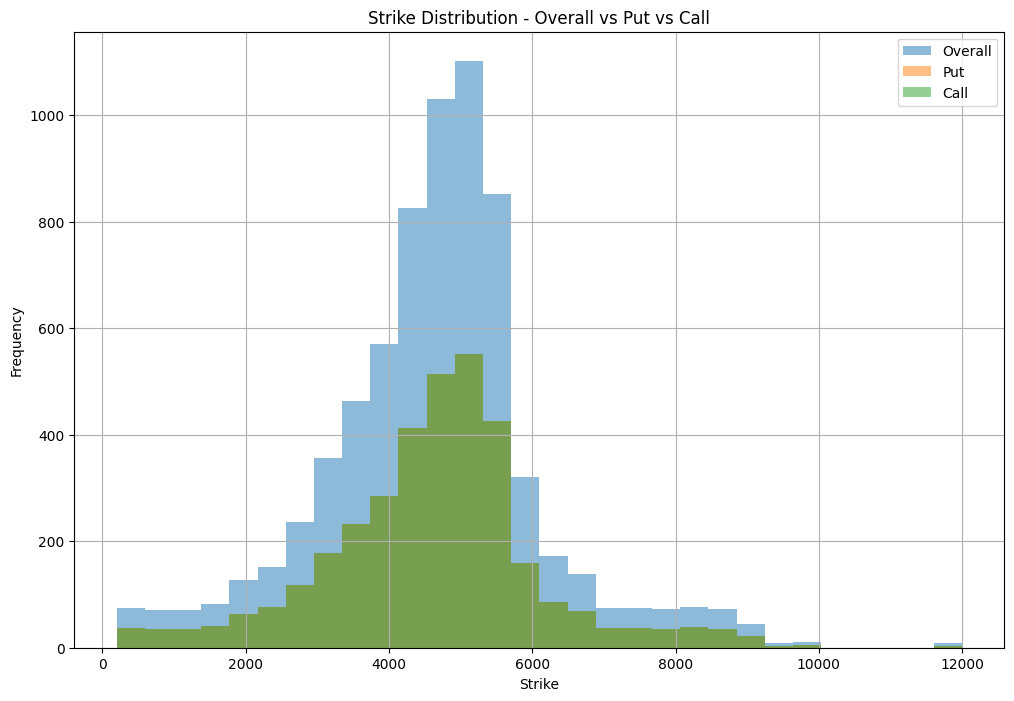

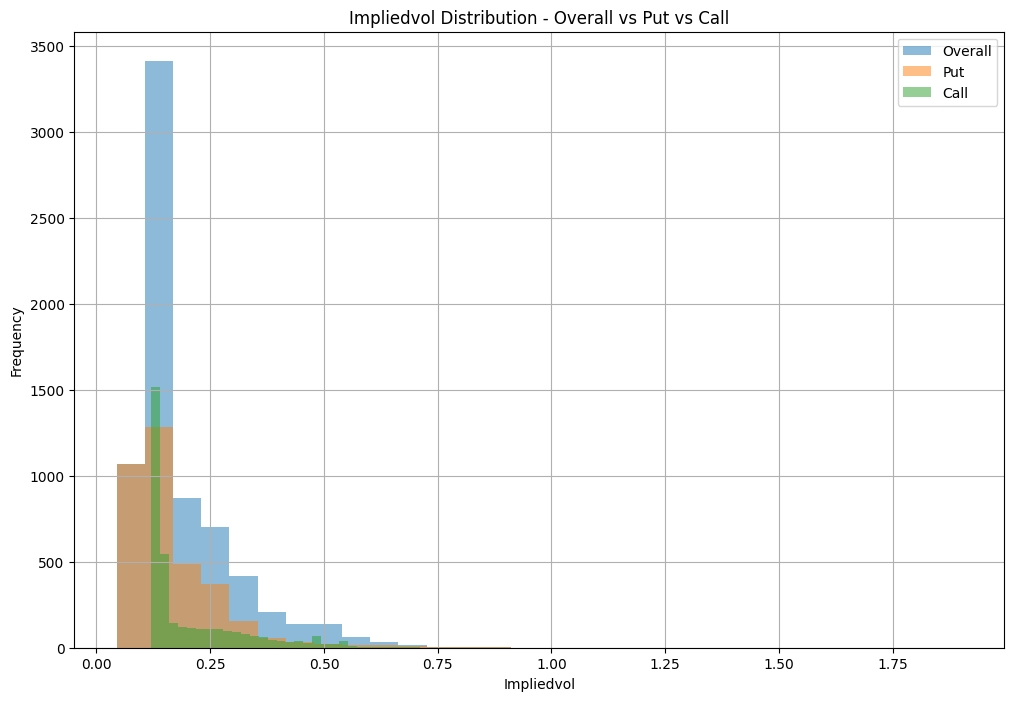

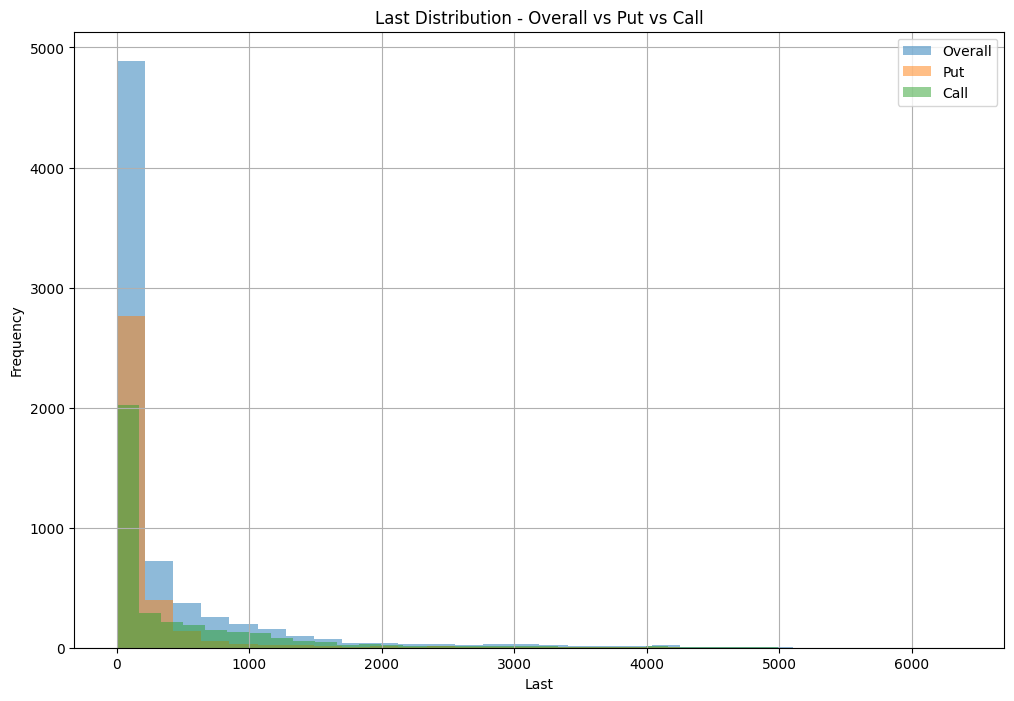

In [62]:
plt.figure(figsize=(12, 8))

for col in ['strike', 'impliedvol', 'last']:
    plt.figure(figsize=(12, 8))
    df[col].hist(alpha=0.5, label='Overall', bins=30)
    df_put[col].hist(alpha=0.5, label='Put', bins=30)
    df_call[col].hist(alpha=0.5, label='Call', bins=30)
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution - Overall vs Put vs Call')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.show()


### Box Plots of values and detecting of outliers

/var/folders/tk/ptln5ljx66g1yqhg_dd36_200000gn/T/ipykernel_66075/3445915919.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/tk/ptln5ljx66g1yqhg_dd36_200000gn/T/ipykernel_66075/3445915919.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/tk/ptln5ljx66g1yqhg_dd36_200000gn/T/ipykernel_66075/3445915919.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


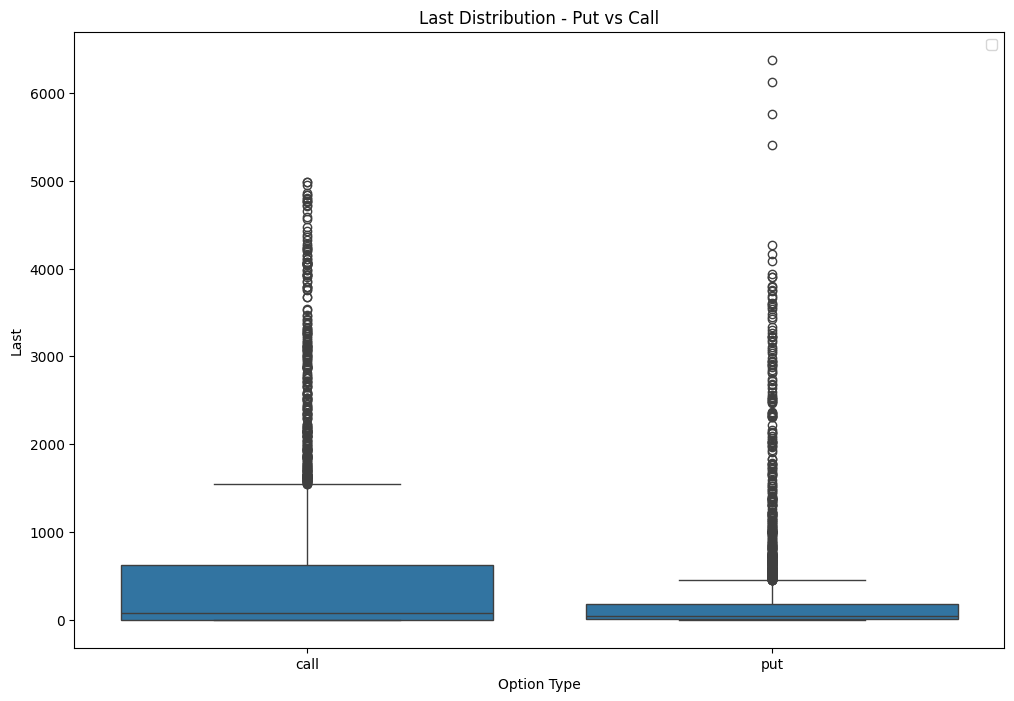

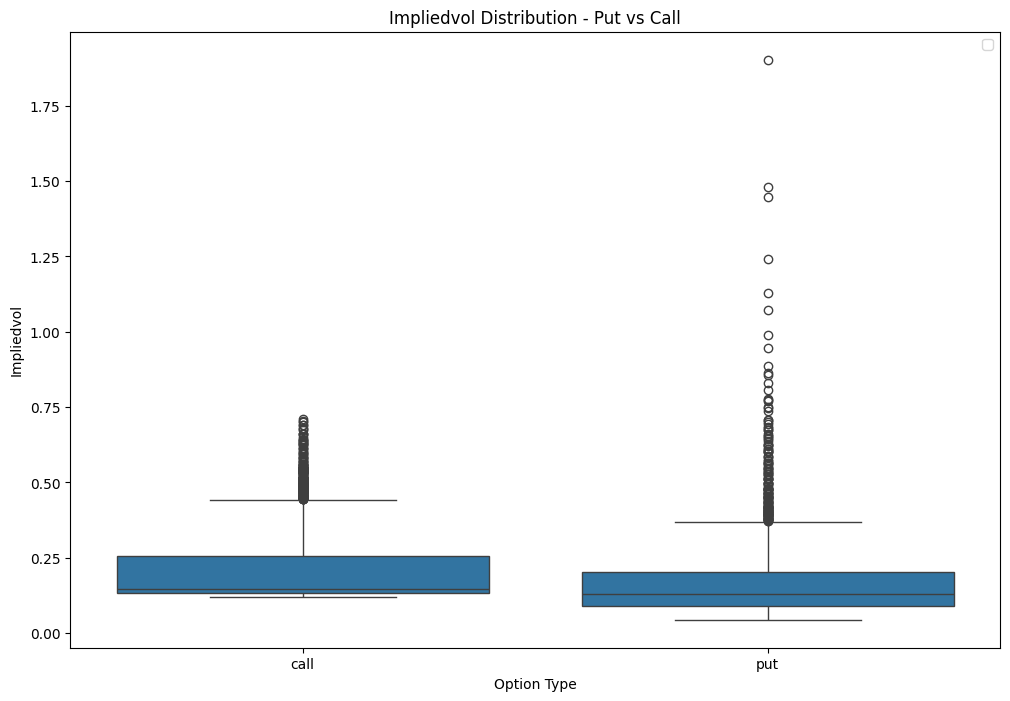

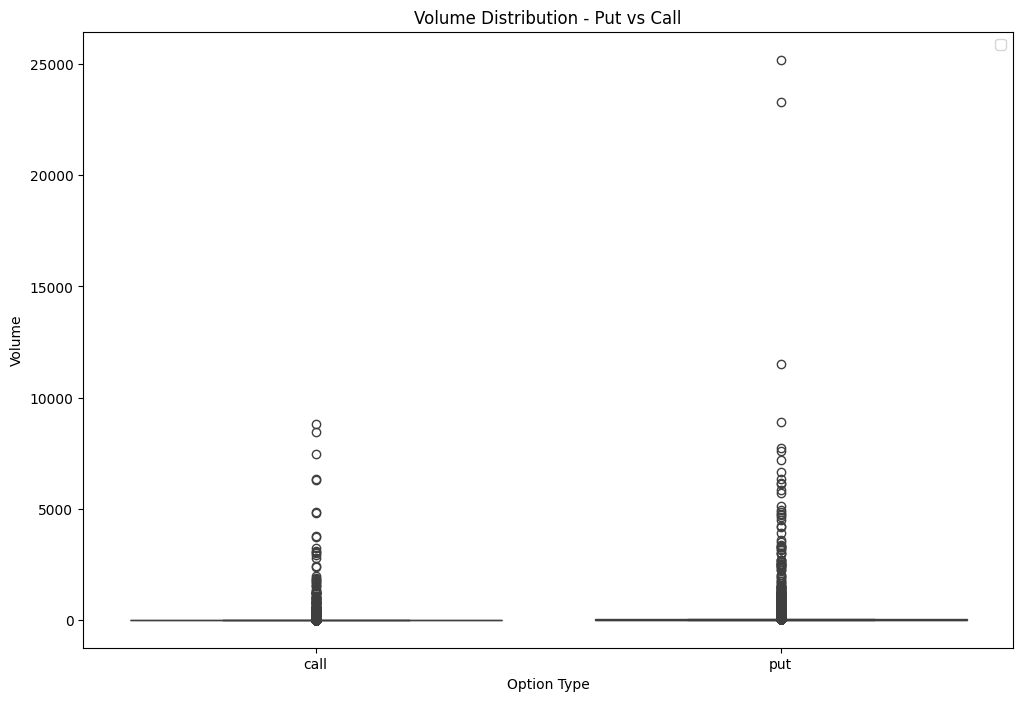

In [66]:
for col in ['last', 'impliedvol', 'volume']:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='type', y=col, data=df)
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution - Put vs Call')
    plt.xlabel("Option Type")
    plt.ylabel(col.capitalize())

# Show plot
plt.show()


# 2. Correlation Analyses

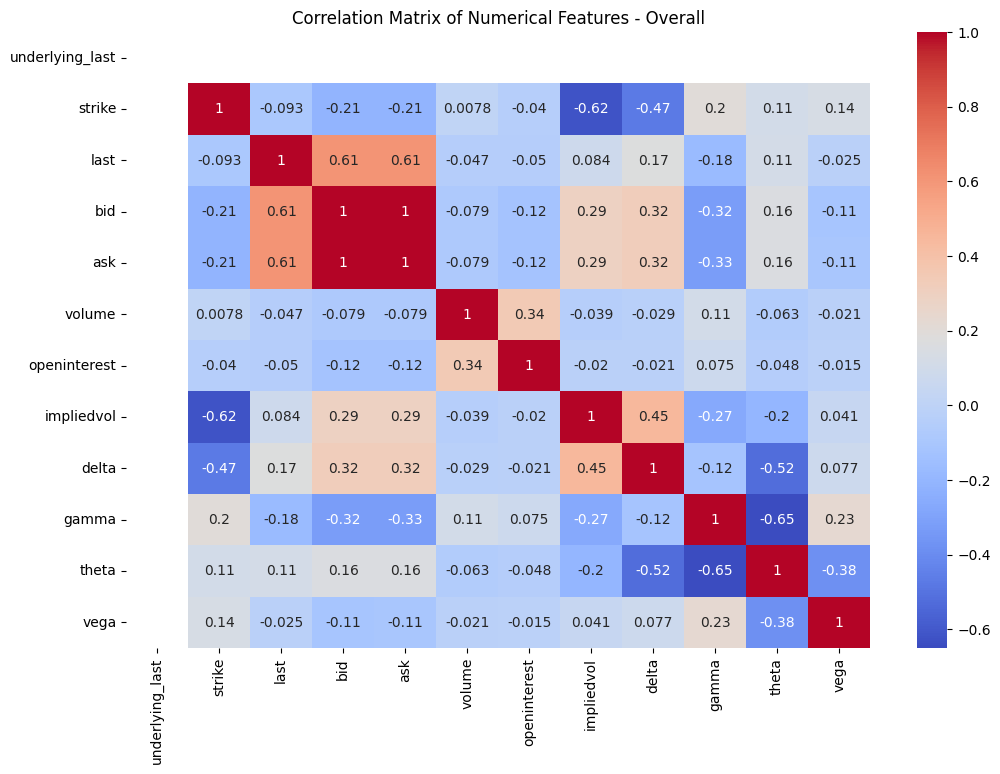

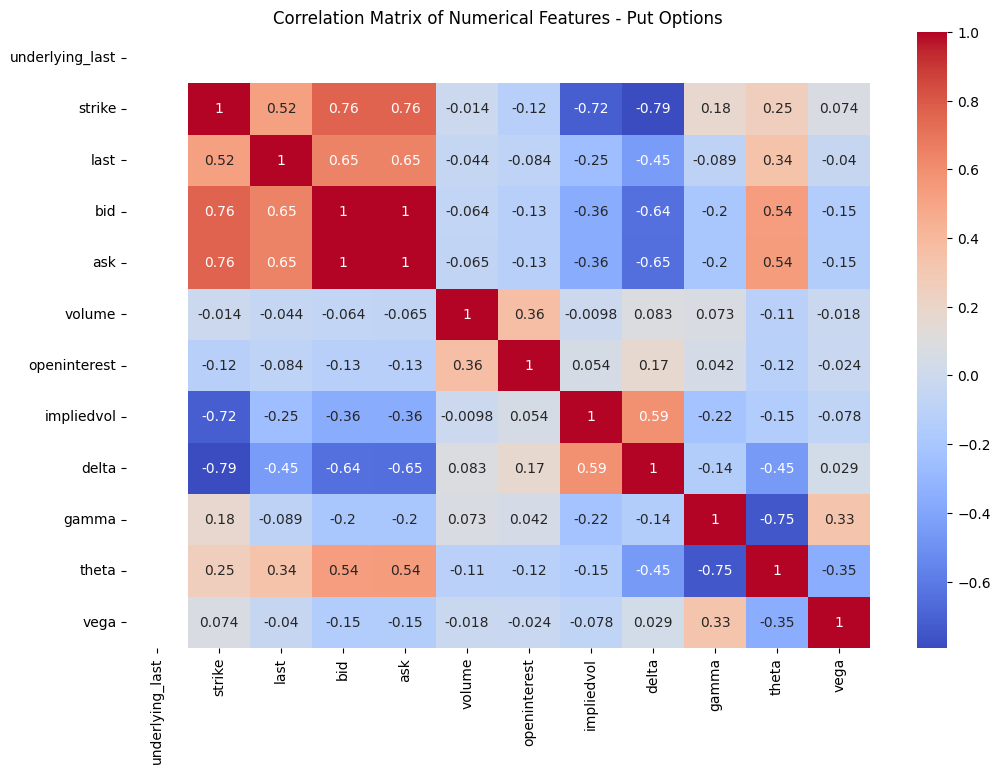

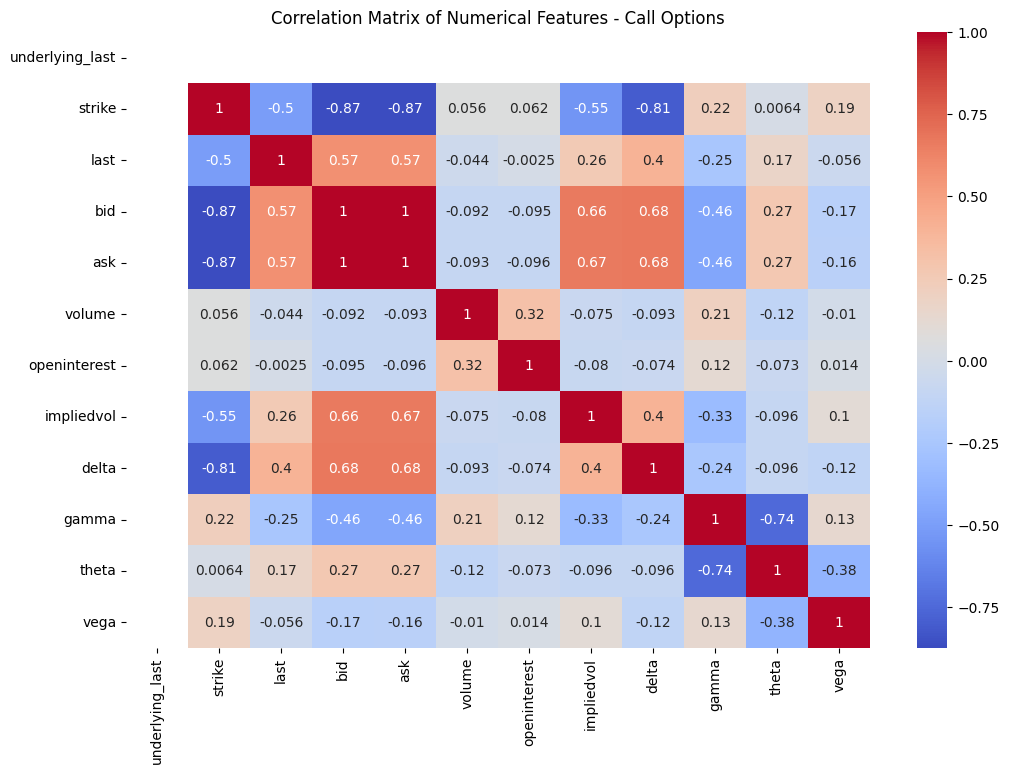

In [72]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Overall')
plt.show()

# Put
numeric_df_put = df_put.select_dtypes(include=['float64', 'int64'])

corr_matrix_put = numeric_df_put.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_put, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Put Options')
plt.show()

# Call
numeric_df_call = df_call.select_dtypes(include=['float64', 'int64'])

corr_matrix_call = numeric_df_call.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_call, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Call Options')
plt.show()


### Pairplots for Overall

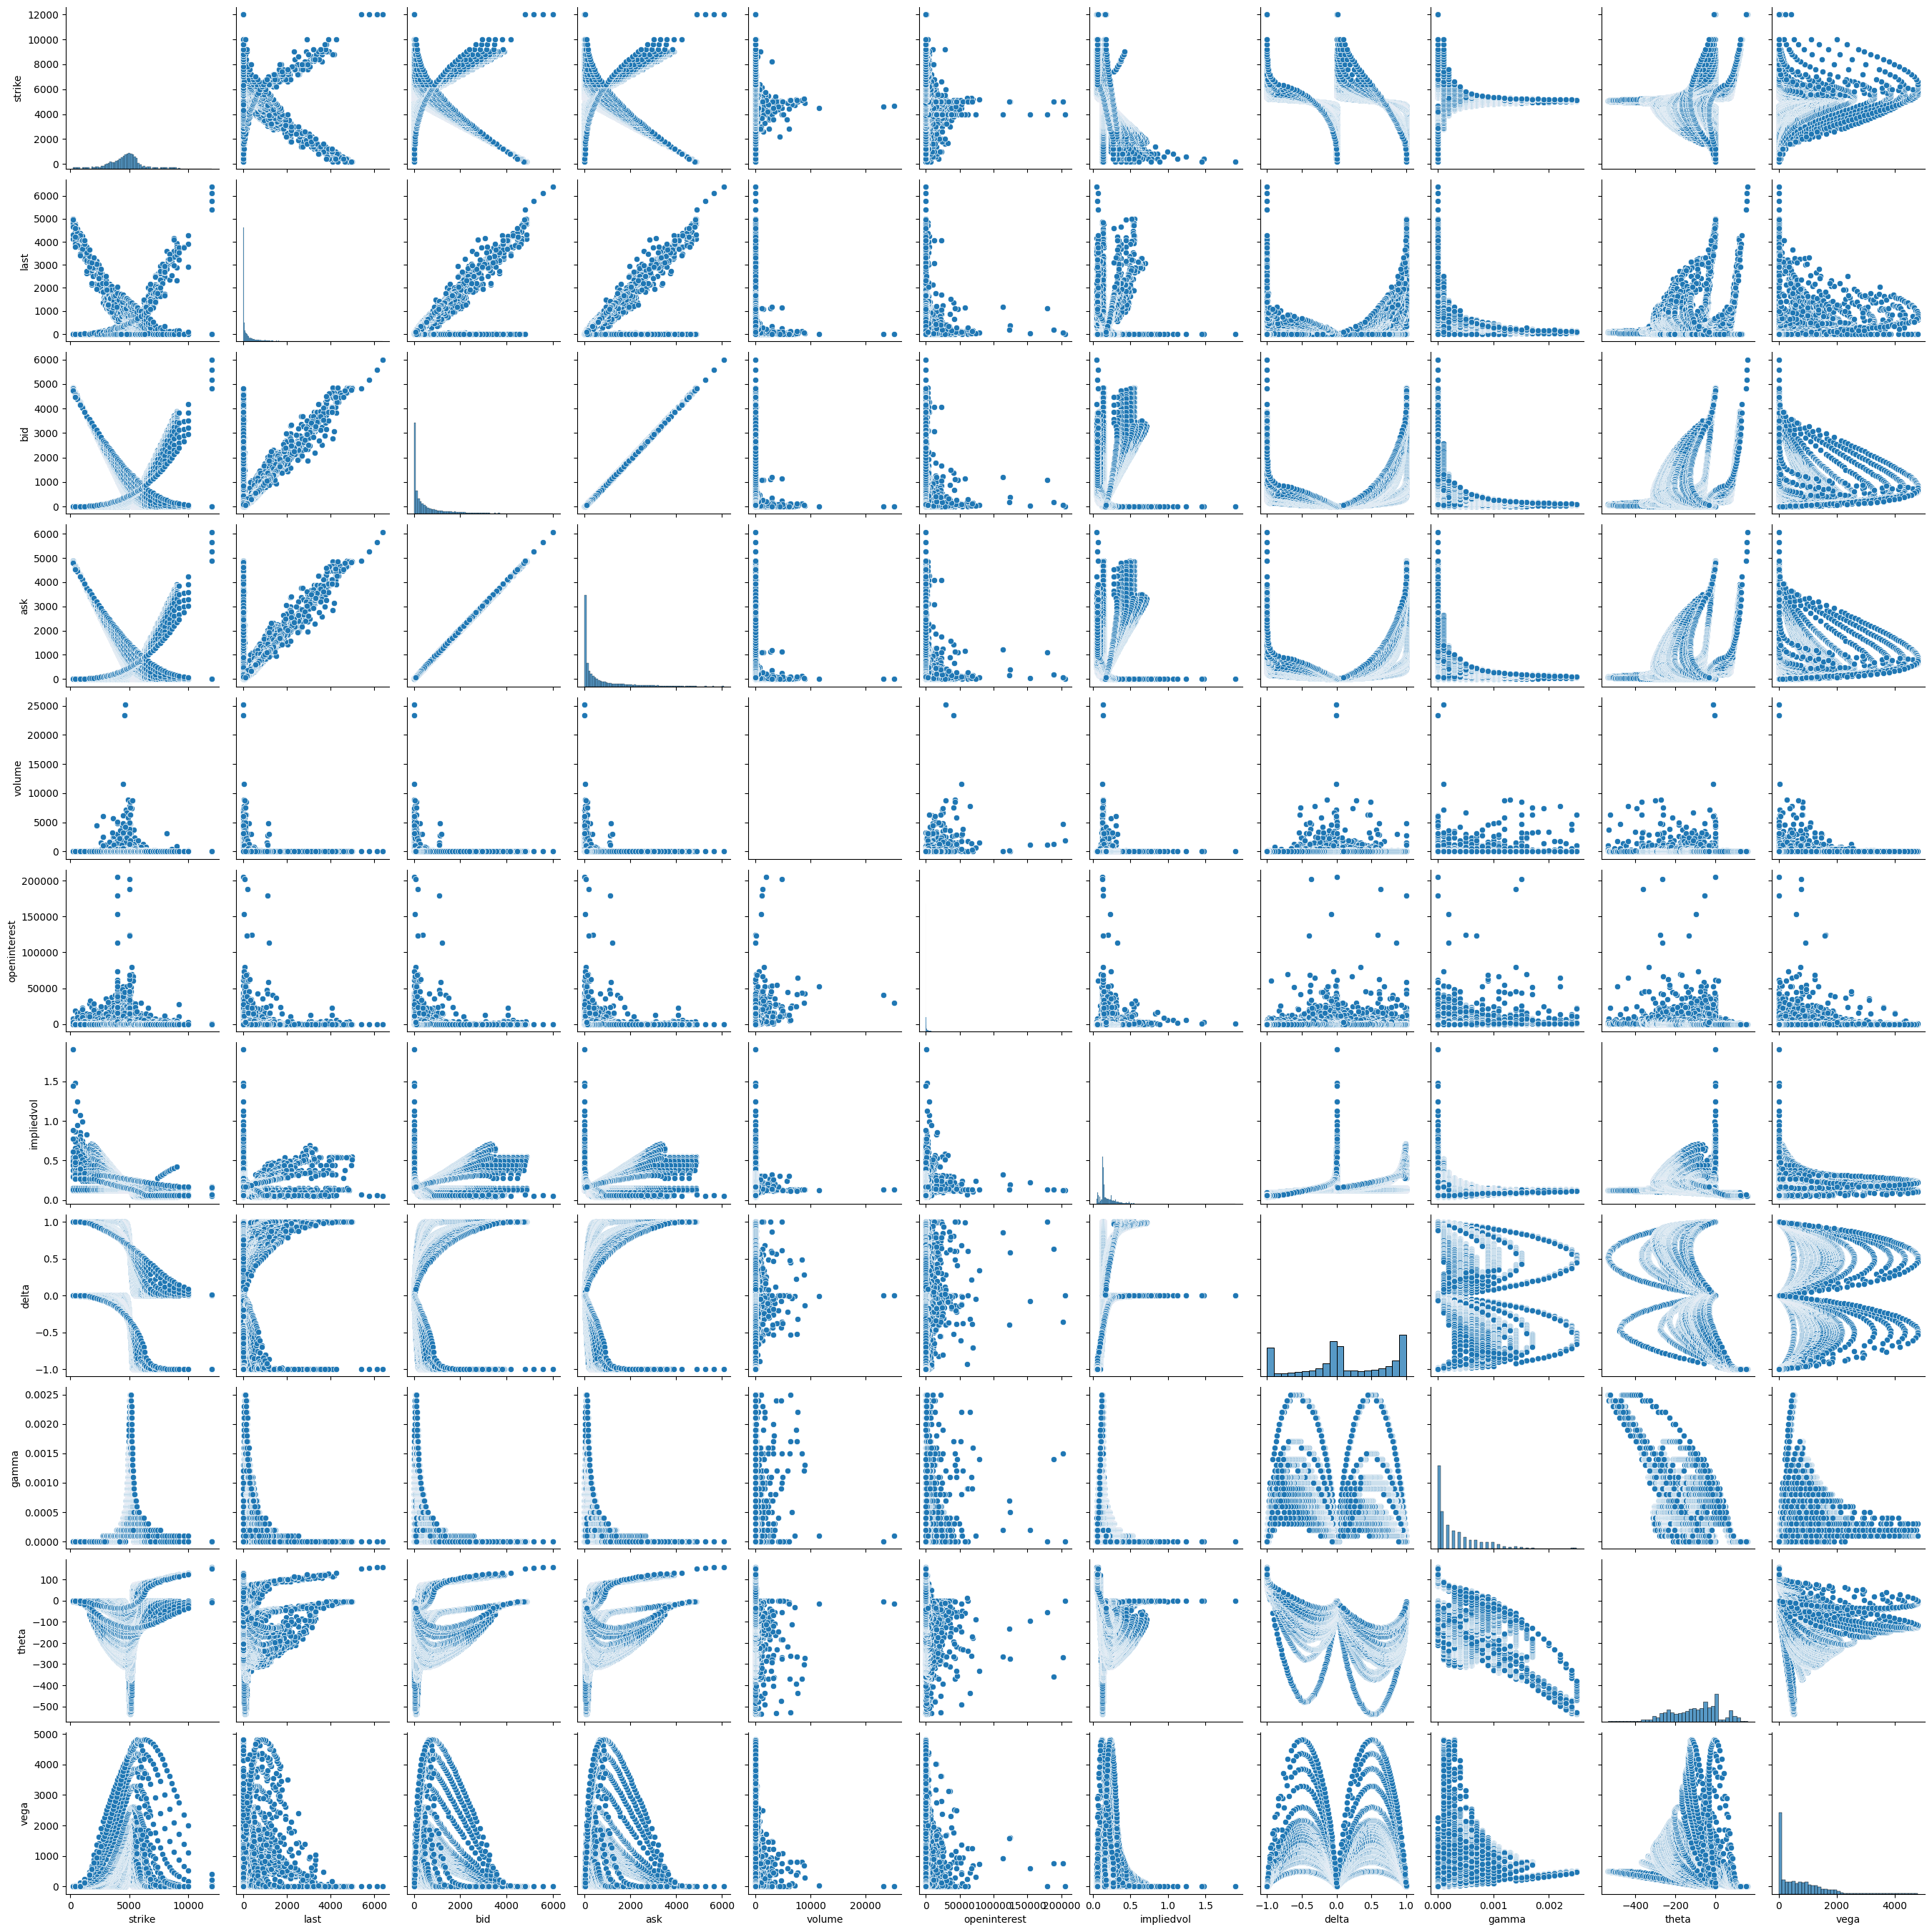

In [75]:
sns.pairplot(df[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

### Pairplots for Puts

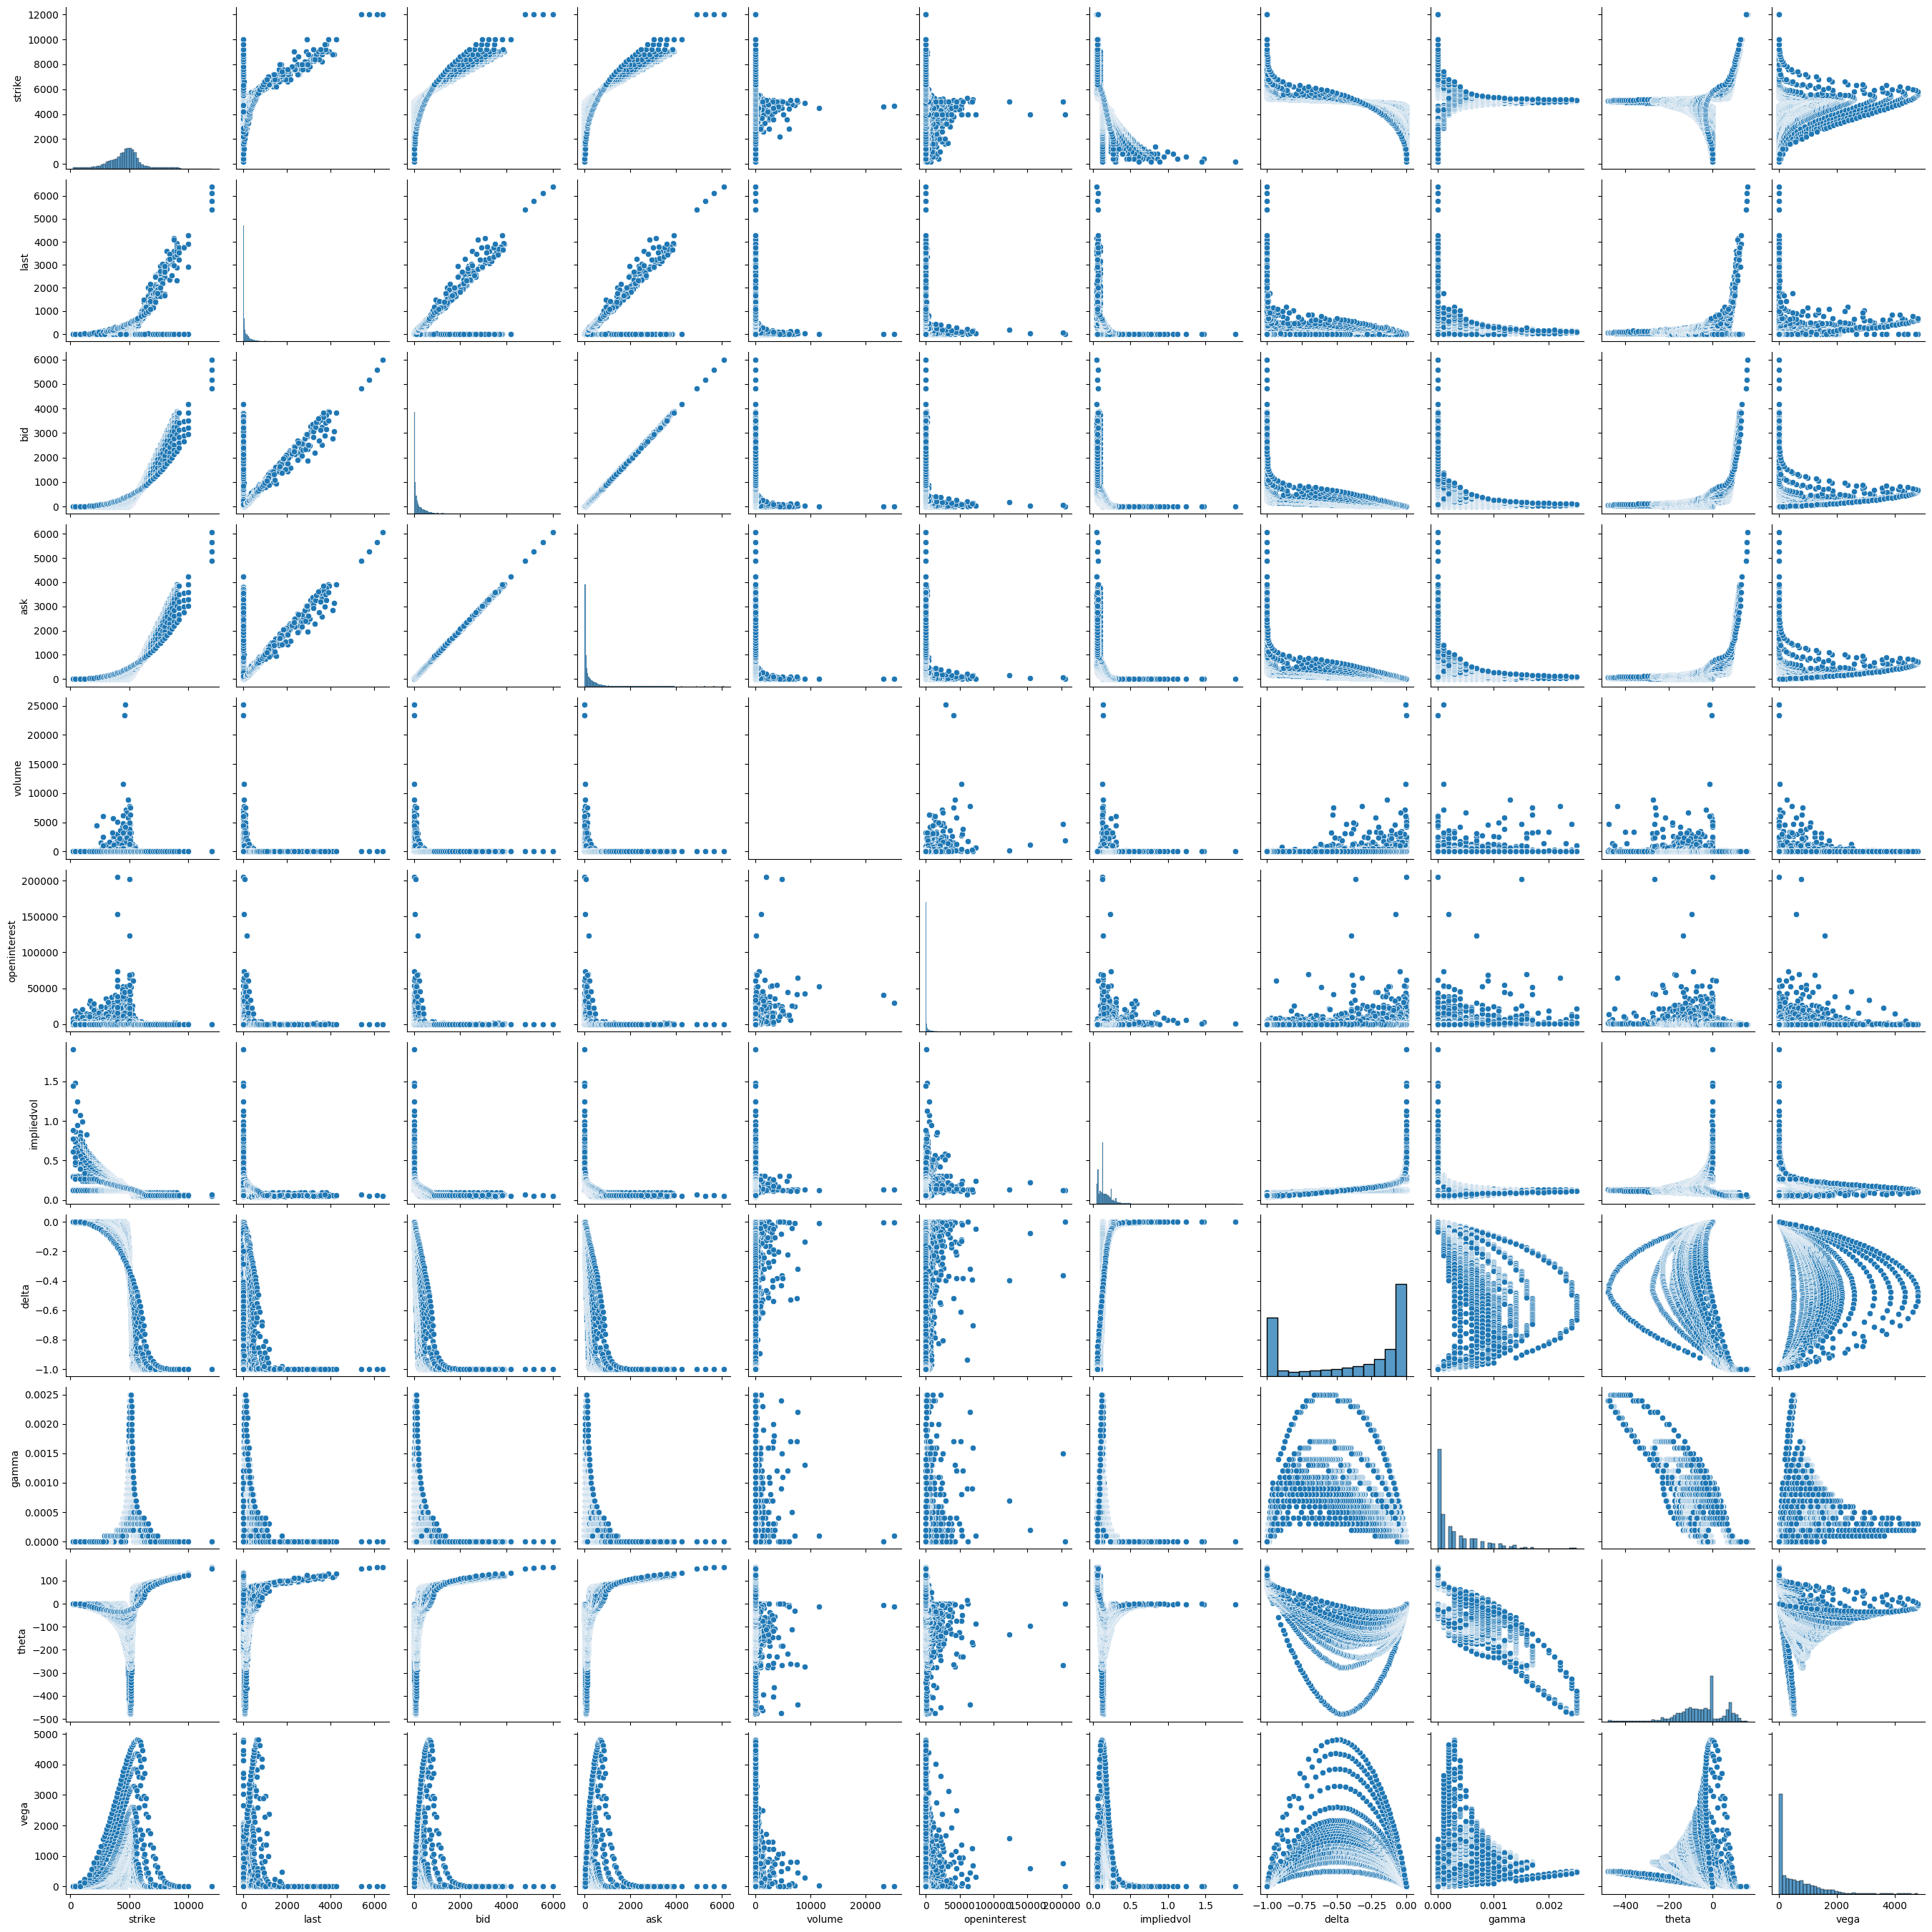

In [76]:
sns.pairplot(df_put[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

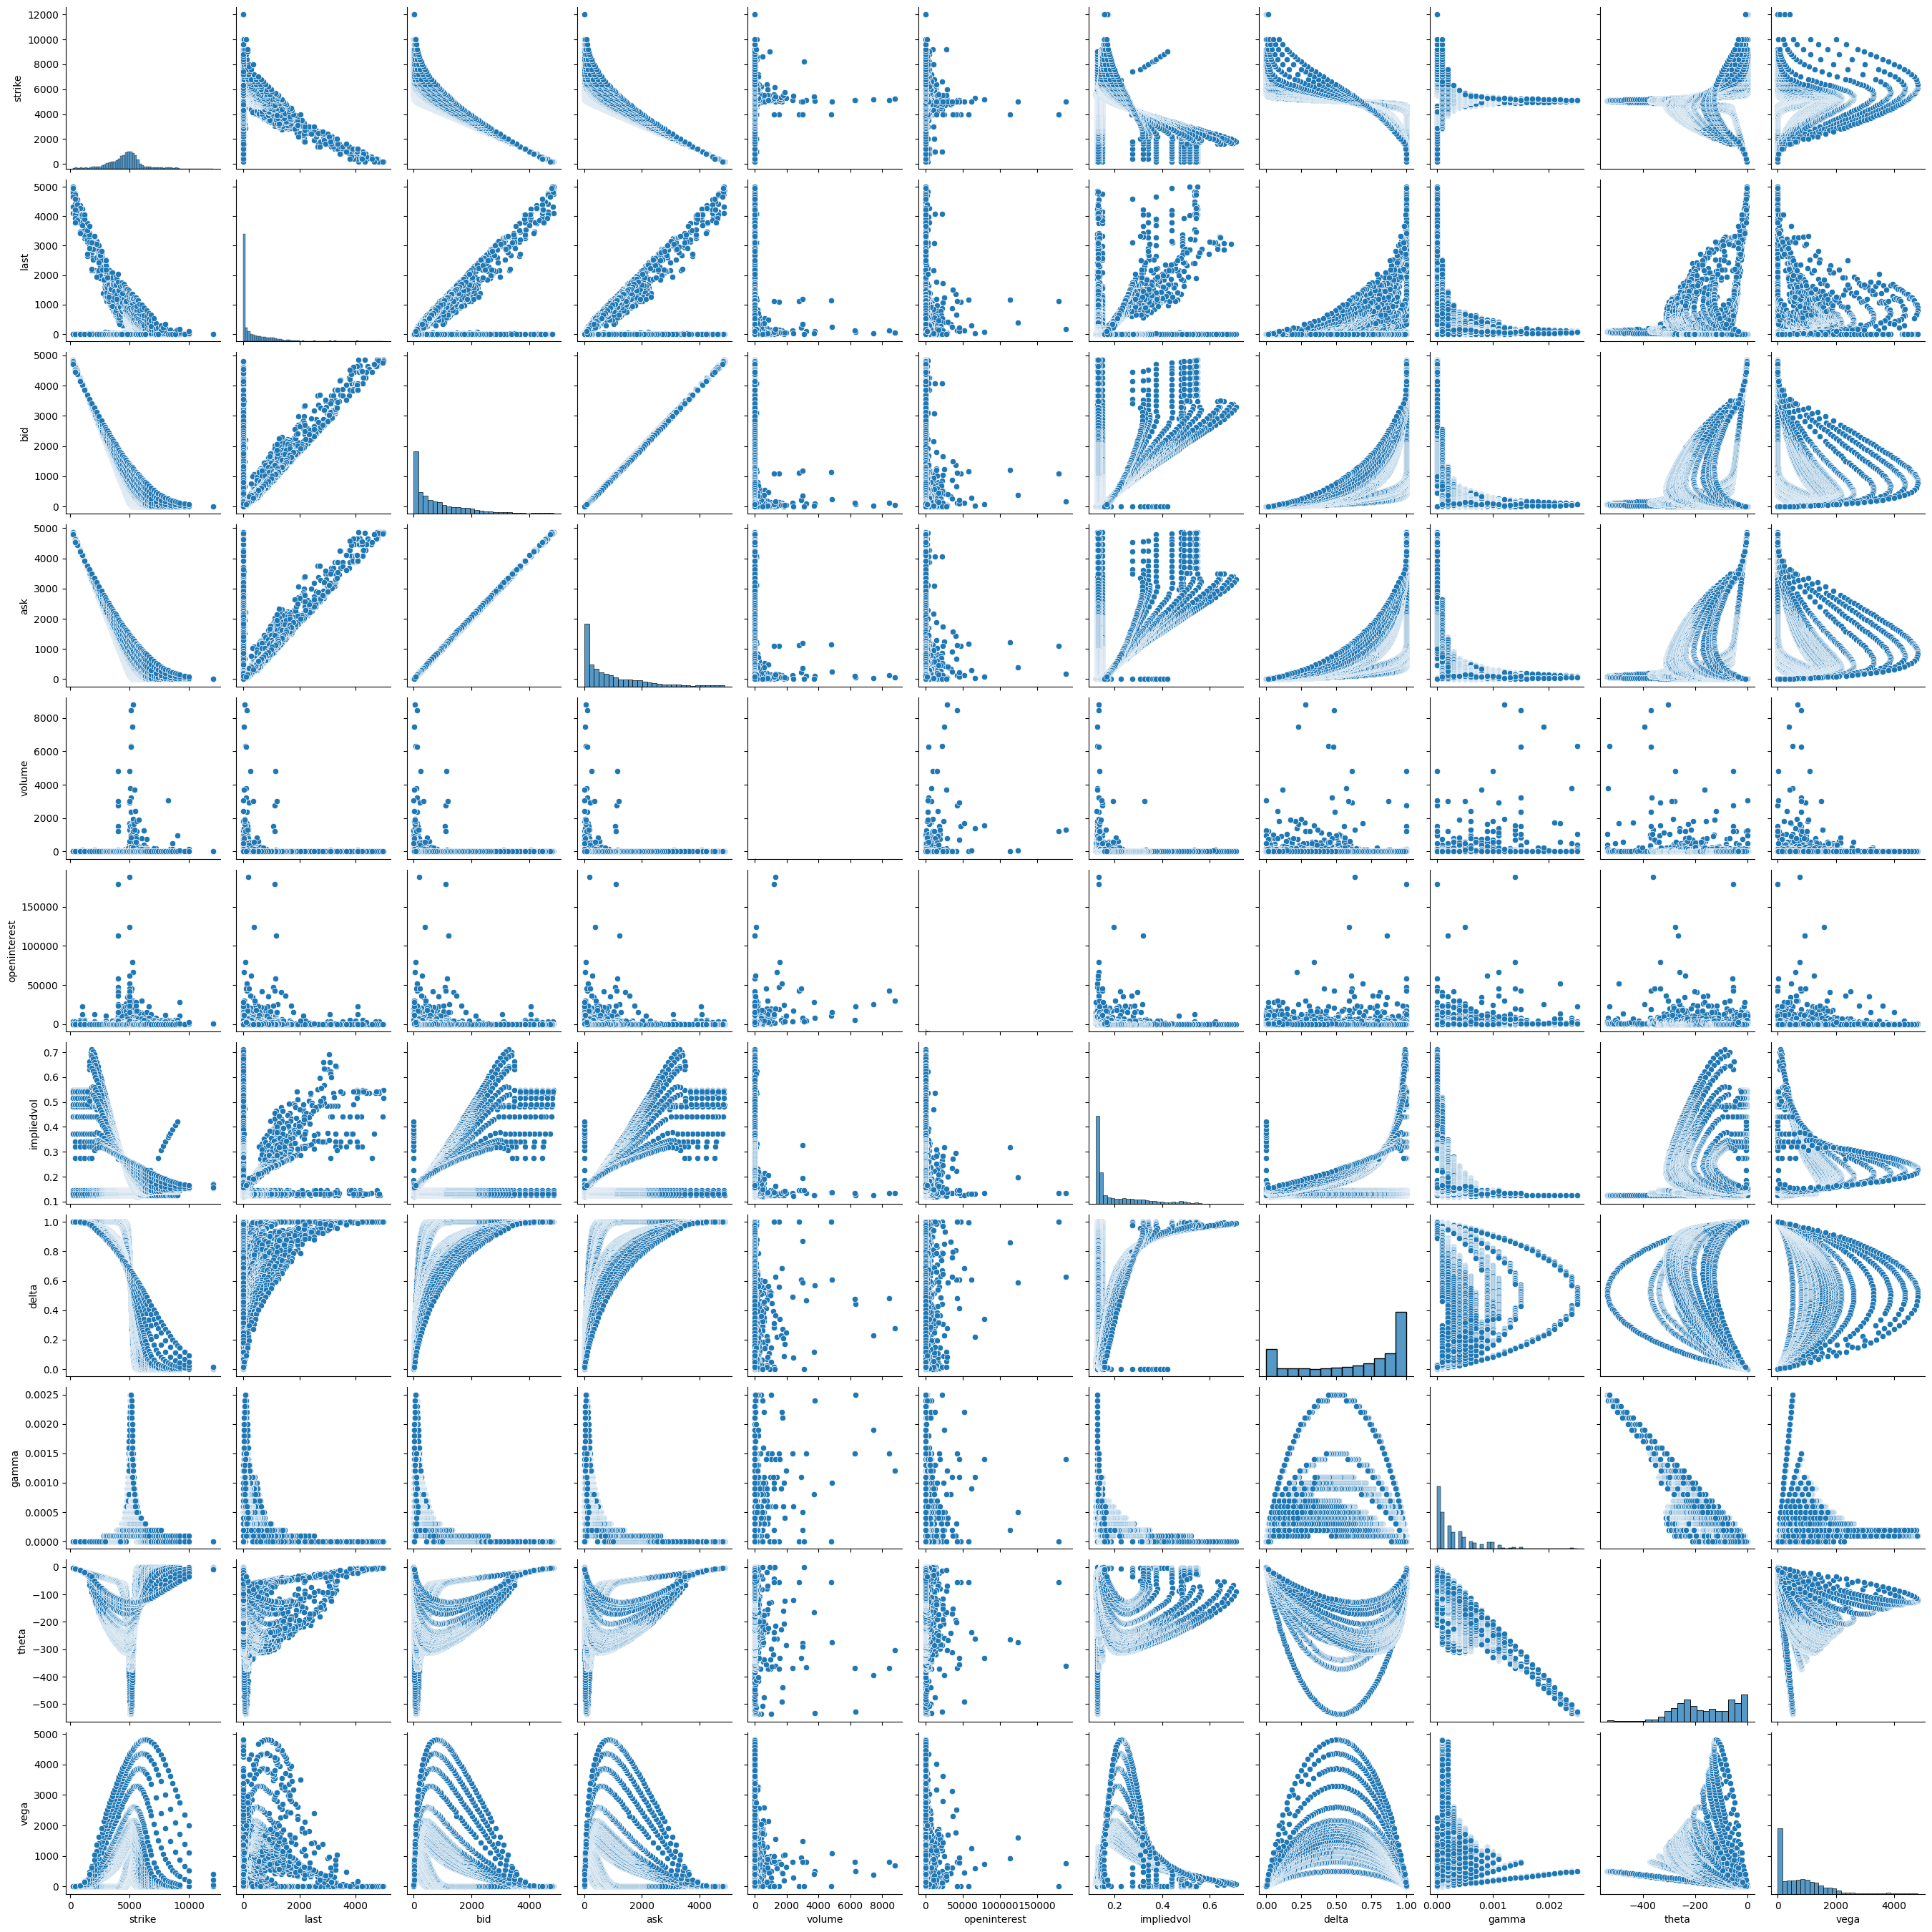

In [77]:
sns.pairplot(df_call[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

# 3. Time Series Data

In [105]:
df.head()

underlying  underlying_last  exchange          optionroot  type  \
0           SPX        5070.4702         *  SPX240517C00200000  call   
4725        SPX        5070.4702         *  SPX250117P04475000   put   
4724        SPX        5070.4702         *  SPX250117C04475000  call   
4723        SPX        5070.4702         *  SPX250117P04450000   put   
4722        SPX        5070.4702         *  SPX250117C04450000  call   

     expiration           quotedate  strike     last     bid     ask  volume  \
0    2024-05-17 2024-04-23 16:00:00     200  4864.98  4862.6  4870.8       6   
4725 2025-01-17 2024-04-23 16:00:00    4475    77.92    76.3    77.3     320   
4724 2025-01-17 2024-04-23 16:00:00    4475    10.50   807.8   817.1       0   
4723 2025-01-17 2024-04-23 16:00:00    4450    74.21    73.4    74.3      23   
4722 2025-01-17 2024-04-23 16:00:00    4450   949.99   829.3   837.0       0   

      openinterest  impliedvol   delta   gamma     theta       vega  \
0              995      0.1255  1.0000  0.0000   -2.7176     0.0000   
4725           641      0.1799 -0.1706  0.0003 -122.0982  1102.5796   
4724            17      0.2573  0.7648  0.0003 -275.5819  1336.5498   
4723          4140      0.1820 -0.1639  0.0003 -120.7001  1074.5200   
4722           205      0.2599  0.7710  0.0003 -274.6315  1316.9946   

      rolling_impliedvol  
0                    NaN  
4725            0.236747  
4724            0.237830  
4723            0.239380  
4722            0.240473

<Axes: xlabel='expiration', ylabel='underlying_last'>

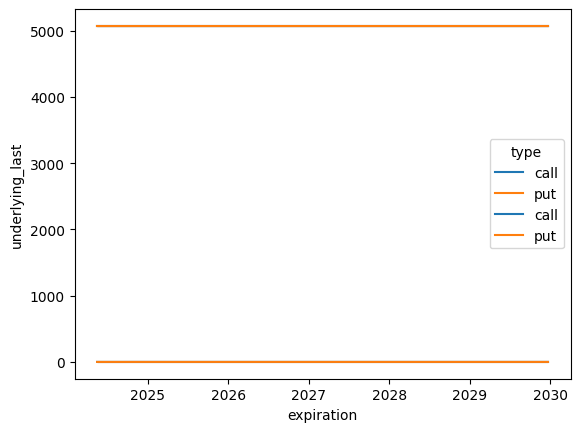

In [110]:
sns.lineplot(x='expiration', y='underlying_last', hue='type', data=df)
sns.lineplot(x='expiration', y='impliedvol', hue='type', data=df)

<Axes: xlabel='expiration', ylabel='last'>

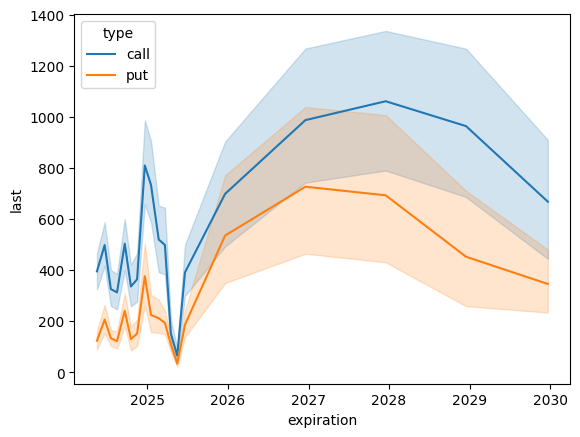

In [112]:
sns.lineplot(x='expiration',y='last',hue='type',data=df)

# 4. Greeks

<Axes: >

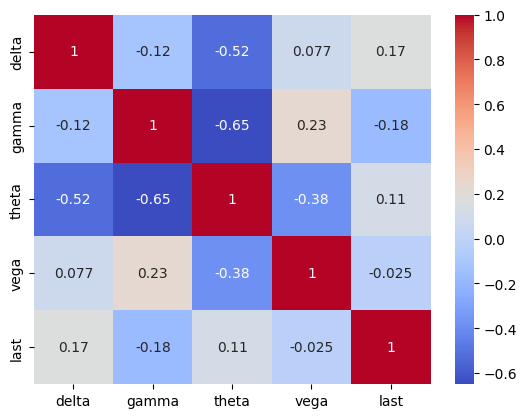

In [94]:
sns.heatmap(df[['delta', 'gamma', 'theta', 'vega', 'last']].corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='delta', ylabel='last'>

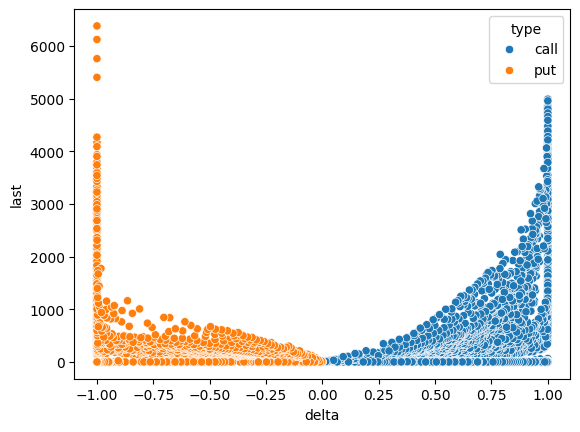

In [91]:
sns.scatterplot(x='delta', y='last', hue='type', data=df)


<Axes: xlabel='gamma', ylabel='last'>

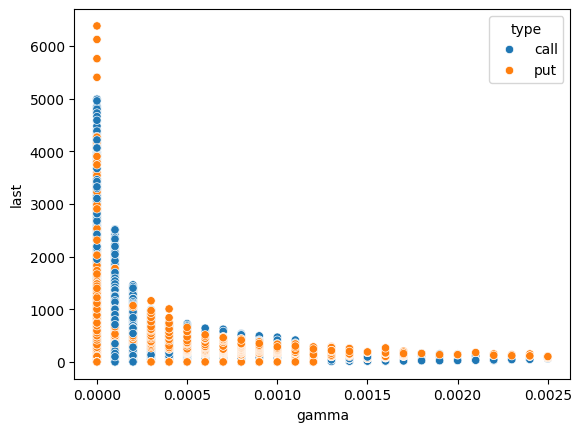

In [93]:
sns.scatterplot(x='gamma', y='last', hue='type', data=df)

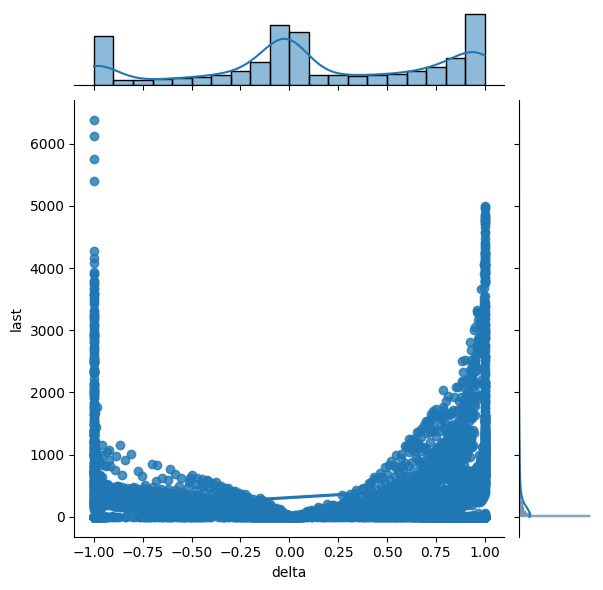

In [95]:
sns.jointplot(x='delta', y='last', data=df, kind='reg')
